# **Gradient Descent**
______

**Gradient Descent** is an optimization algorithm used in machine learning and deep learning to minimize the error (loss) of a model. In this notebook, Gradient Descent will be explored in various ways using the **Texas Weather** dataset in oder to achieve some understanding of this supervised machinle learning algorithm.

## **Objectives of this Notebook**
- Comprehend the basic concept of Gradient Descent.
- Peform data exploration and visualization
- Build  Gradient Descent model to predict Solar Radiation

______

## **Data Exploration**

### Import Libraries

In [21]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Load Data

In [22]:
df = pd.read_csv('../../weather_data.csv')

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### Listing the columns in the Dataset


In [23]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')

### Checking the Data Per Column

In [24]:
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

### Checking the Data types in each Column

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


______

## **Data Cleaning**
Data cleaning is an important aspect of data explorations step

### Correcting the data types of all the columns

The data column data type is not favourable for our model development

In [26]:
# Changing the data type and ensuring the changes

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


### Checking for Duplicates

In [27]:
# Making dure there are no dulicates

duplicate = df.duplicated().sum()
print(f"Duplicates in the dataset: {duplicate}")

Duplicates in the dataset: 0


### Checking for Missing Values

In [28]:
df.isnull().sum()

date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

_______

## **Feature Distribution**

In this section, some graphs shall be used to explore the realtionships between columns and features of the dataset that are relevant to our Solar Radiation prediction model

### **Correlation Heatmap**

The **correlation heatmap** plot will be a perfect graph to display the relationships between all numeric features at once.

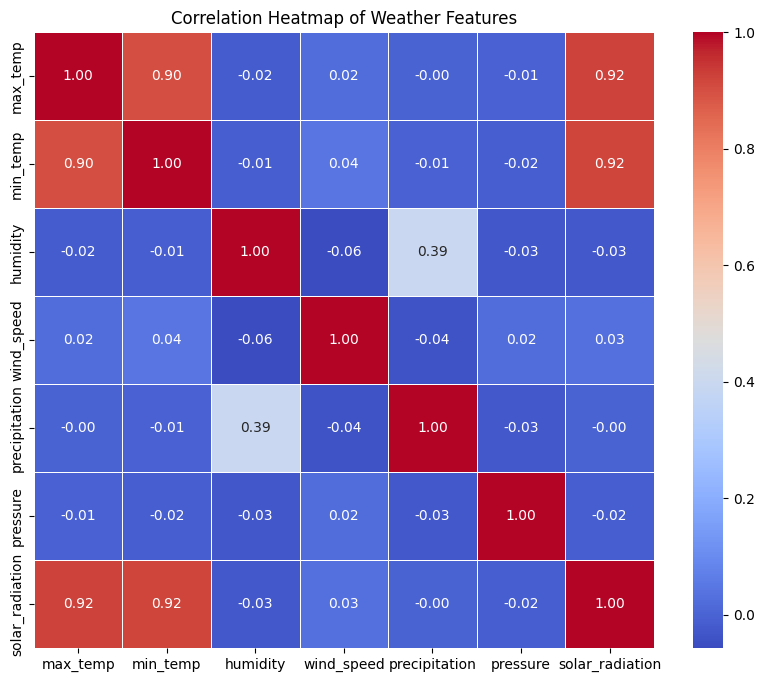

In [29]:
# Drop the non numeric columns which is 'date'
numeric_df = df.drop(columns=['date'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features')
plt.show()

**Interpretation on Graph**

- Temperature & Solar Radiation 
    - Max temperature (max_temp) and solar radiation have a strong positive correlation (0.92), meaning higher solar radiation tends to increase temperature.

    - Min temperature (min_temp) and solar radiation also show a high positive correlation (0.92).


- Temperature Relationship
    - Humidity and precipitation have a moderate positive correlation (0.39), which shows higher humidity often leads to more rainfall.

- Low Correlations with Other Variables
    - Many other correlations in the dataset are weak, this is to mean that there is little to no direct relationship between those variables.    


_____

### **Histogram  Plot of Solar Radiation**

The purpose of the histogram  is to understand the distribution of the target variable (solar_radiation)

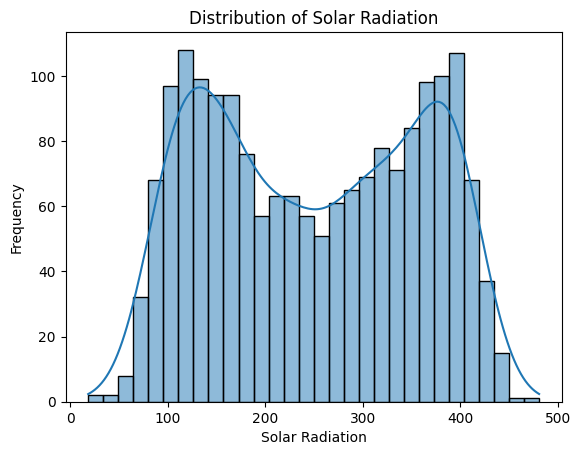

In [30]:
# Let rain be equall to percipitation for the sake of the tasks to identify rain and no rain

sb.histplot(data=df, x='solar_radiation', bins=30, kde=True)
plt.title('Distribution of Solar Radiation')
plt.xlabel('Solar Radiation')
plt.ylabel('Frequency')
plt.show()

**Interpretation on Graph**

- There are two distinct peaks in the distribution, which suggests that it is bimodal:
    - There is one peak at about 100, indicating that low sun radiation levels happen regularly.

    - Around 400, there is another peak that indicates that high amounts of solar radiation also happen regularly.


This bimodal shape raises the possibility that the dataset comprises two distinct groups, maybe representing several places, seasons, or times of day where solar energy varies.
_____

### **Scatter Plot of Solar Radiation vs. Another Feature**
High humidity can often indicate cloudy or rainy conditions, which might reduce solar radiation. The purpose of the scatter plot is to show a negative correlation between the two.

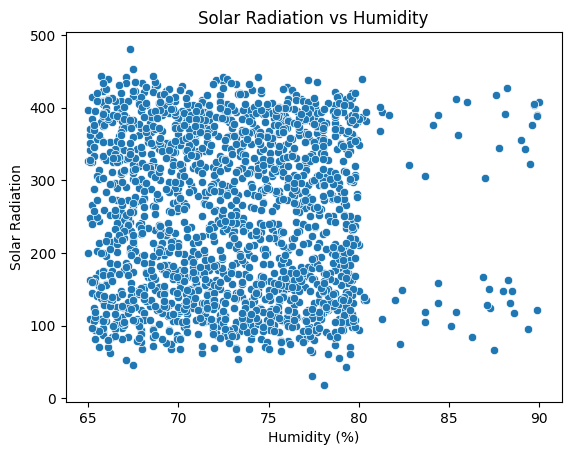

In [31]:
sb.scatterplot(data=df, x='humidity', y='solar_radiation')
plt.title('Solar Radiation vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Solar Radiation')
plt.show()

**Interpretation on Graph**

- Most data points cluster between 65% and 80% humidity, indicating that most recorded humidity values fall within this range.

- The data points between 80% and 85% humidity show a clear gap, indicating that this humidity range is less common in the dataset.

- Data points are more sparse at higher humidity levels (over 85%), suggesting that high humidity circumstances are less frequent.
_____

## **Solar Radiation Prediction with Gradient Descent**

In this section a Gradient Descent will be built to peform a prediction task of predicting solar radiation. The math and logic behind the development of the model shall also be explored. This would provide a greater understanding to the topic and the code below.

### **The Math Behind Gradient Descent**

### Model Equation :

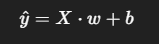

Whereby;

- X: feature matrix (n_samples × n_features)

- 𝑤
w: weights (coefficients)

- 𝑏
b: bias (intercept)

- 𝑦
^
y
^
​
 : predicted solar radiation

Notice this expression is the same as a **linear regression**, this is due to the task being a linear problem. Geting a target variable based on other features. 


### Gradient Descent

We update the weights and bias to reduce the error:

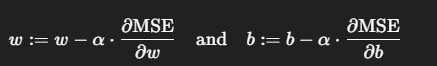

Where 
𝛼
α is the learning rate.

The gradients are:

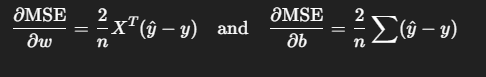


Where MSE is Mean Squared Error.



### **The Custom Gradient Descent Model**

The code below is a custom gradient descent model. From earlier analysis from the feature distributions, solar radiation is not correlated with a some features in the dataset. Those that seem to affect the solar radiation are minimun and maximum temperatures and humidity. So this model will be built with the target being solar radiation and the x features being the two temperatures and humidity. Let's see how that works.

Epoch 0: Loss = 74083.6876
Epoch 100: Loss = 2366.8679
Epoch 200: Loss = 1287.3475
Epoch 300: Loss = 1268.4324
Epoch 400: Loss = 1268.0955
Epoch 500: Loss = 1268.0867
Epoch 600: Loss = 1268.0847
Epoch 700: Loss = 1268.0833
Epoch 800: Loss = 1268.0824
Epoch 900: Loss = 1268.0818


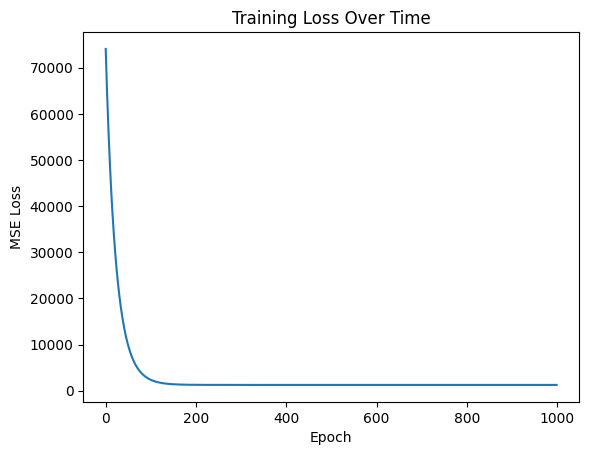


Learned Weights:
max_temp: 53.1849
min_temp: 52.3757
humidity: -1.1959
bias: 249.4274


In [32]:
# Select features and target
features = ['max_temp', 'min_temp', 'humidity']
target = 'solar_radiation'

X = df[features].values
y = df[target].values

# Normalize features for better gradient descent performance
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = y.reshape(-1, 1)  # Make y a column vector

# Add bias intercept
X = np.hstack([X, np.ones((X.shape[0], 1))])  

# Initialize weights and including bias
weights = np.zeros((X.shape[1], 1))

# Gradient Descent Parameters
learning_rate = 0.01
epochs = 1000
n = X.shape[0]  

loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    y_pred = X @ weights 
    error = y_pred - y

    # Compute gradient
    grad = (2/n) * X.T @ error

    # Update weights
    weights -= learning_rate * grad

    # Compute and store loss
    loss = (1/n) * np.sum(error ** 2)
    loss_history.append(loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.4f}')

# Plot loss over time
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Time')
plt.show()

# Display final weights
feature_names = features + ['bias']
print("\nLearned Weights:")
for name, w in zip(feature_names, weights.flatten()):
    print(f"{name}: {w:.4f}")


### **Interpretation of Learned Weights**

The model learned this (as a mathematical equation) :

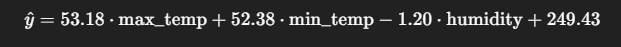

Where \hat{y} is the predicted solar radiation.

### What Each Coefficient means:

- Assuming all other factors remain unchanged, solar radiation rises by around 53 units for every unit increase in maximum temperature.

- Strongly positive influence—naturally, given that hotter days are typically associated with higher sun radiation.

- Minimum temperature = -1.20 tells a similar story to maximum temperature. It also tracks solar radiation. 

- According to the model, solar radiation will decrease by about 1.2 units for every 1% rise in humidity.

- This makes sense because greater clouds or precipitation tend to obstruct sunlight when humidity levels are higher.

- The bias is 249.43, which mean this is the model’s base prediction when all features are 0 (after normalization).

##### All this simply means;

- The model determined that the primary cause of solar radiation is temperature.

- The model found that, as predicted, dampness somewhat reduces solar radiation.

- This model is therefor consistent with intuition in the real world.
______


## **Conclusion and Final Notes**

In this notebook weather data is used to predict solar radiation using Gradient Descent model.  This exercise provided a thorough exploration of the data and understanding of the mathematical foundation of optimization and model training, going beyond simply implementing a machine learning technique.

### Final Notes

- The model was trained from scratch using gradient descent, reducing mean squared error (MSE) between predicted and actual solar radiation values.

- A thorough correlation analysis guided feature selection, identifying max_temp, min_temp, and humidity as the most informative predictors.

- The model successfully learned meaningful relationship, which means;

    - Max and min temperature had strong positive weights, confirming their direct relationship with solar radiation.

    - In in line with the notion that more humidity (cloud cover) limits sunlight, humidity showed a negative weight.

- The optimization process successfully converged, as shown by the loss steadily declining across epochs.

